In [1]:
from torch import load, save
from importlib import reload


In [2]:
import model
reload(model)
Sequential = model.Sequential
ReLU = model.ReLU
Conv2d = model.Conv2d
NNUpsampling = model.NNUpsampling
Sigmoid = model.Sigmoid
MSE = model.MSE
Upsampling = model.Upsampling


# Load training data

In [3]:
# Load train data
TRAIN_PATH = '../data/train_data.pkl'
train_noisy_imgs_input, train_noisy_imgs_target = load(TRAIN_PATH)
train_noisy_imgs_input = train_noisy_imgs_input/255
train_noisy_imgs_target = train_noisy_imgs_target/255
training_set_size,num_channels,y_size,x_size = train_noisy_imgs_input.shape

In [4]:
class Model():
    def __init__(self, in_channels=3, out_channels=3, lr=1e-3):
        # instantiate model + optimizer + loss function + any other stuff you need
        self.model = Sequential(
                        Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, stride=2, padding=1),
                        ReLU(),
                        Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
                        ReLU(),
                        Upsampling(scale_factor=2, in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1),
                        ReLU(),
                        Upsampling(scale_factor=2, in_channels=16, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                        Sigmoid()
                        )
        self.criterion = MSE()
        self.lr = lr

    def load_pretrained_model(self):
        ## This loads the parameters saved in bestmodel.pth into the model
        self.model = load('bestmodel.pth')

    def train(self, train_input, train_target):
        # train ̇input: tensor of size (N, C, H, W) containing a noisy version of the images.
        # train target: tensor of size (N, C, H, W) containing another noisy version of the
        # same images, which only differs from the input by their noise.
        batch_size = 32
        nb_epochs = 1
        self.losses = []
        avg_loss = 0

        for e in range(nb_epochs):
            print('Doing epoch %d'%e)
            for b in range(0, train_input.size(0), batch_size):
                if b % 5 == 0 and (b+e) > 0:
                    self.losses.append(avg_loss/5)
                    avg_loss = 0
                    b%50 ==0 and print(self.losses[-1])
                # forward pass
                output = self.model(train_input[b:b+batch_size])
                loss = self.criterion(output, train_target[b:b+batch_size])
                avg_loss+=loss.item()
                # make step
                self.model.zero_grad()
                gradient = self.criterion.backward()
                gradient = self.model.backward(gradient)
                for (parameter,_) in self.model.param():
                    parameter -= parameter.grad*self.lr

    def predict(self, test_input):
        #:test ̇input: tensor of size (N1, C, H, W) that has to be denoised by the trained
        # or the loaded network.
        #: returns a tensor of the size (N1, C, H, W)
        return self.model(test_input)

In [5]:
ourModel = Model()
ourModel.train(train_noisy_imgs_input, train_noisy_imgs_target)

Doing epoch 0
0.2771243453025818
0.2799091160297394
0.2868725538253784
0.27723228931427
0.288811582326889
0.2884644627571106
0.2818488359451294
0.2877740740776062
0.2879298567771912
0.28041521906852723
0.2881928086280823
0.28553634881973267
0.29234575629234316
0.27589080929756166
0.2855688512325287
0.27527101039886476
0.2889546513557434
0.2780523419380188
0.2950819194316864
0.2760018646717072
0.279107528924942
0.2820999264717102
0.2749731123447418
0.2780317187309265
0.2899002194404602
0.29160929322242735
0.28477885127067565
0.2852858483791351
0.2871181845664978
0.2888992130756378
0.2829789876937866
0.28855410814285276
0.2922124683856964
0.2871758222579956
0.28253173828125
0.2731612741947174
0.28502439260482787
0.2944347083568573
0.2826573610305786
0.2892374455928802
0.2863263666629791
0.2796819269657135
0.2830905616283417
0.29826643466949465
0.2850550651550293
0.29186041951179503
0.28835591673851013
0.28432453274726865
0.281721419095993
0.28194077014923097
0.2820677816867828
0.28115455

Text(0, 0.5, 'loss')

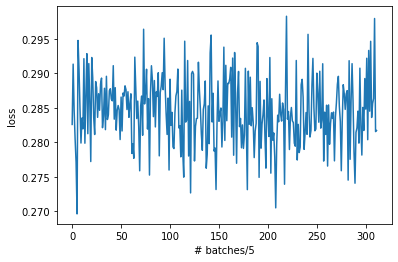

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(ourModel.losses)
plt.xlabel('# batches/5')
plt.ylabel('loss')

Text(0.5, 1.0, 'Target')

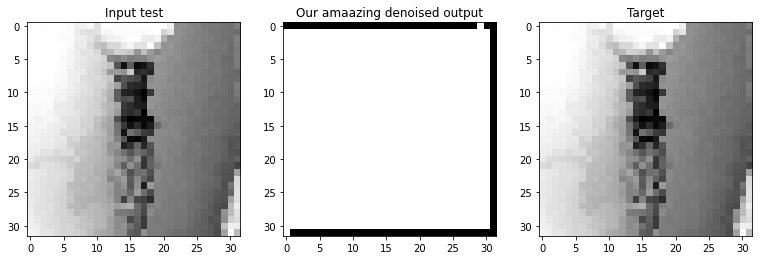

In [15]:
test_input = train_noisy_imgs_input

nr = 1
denoised = ourModel.predict(test_input[nr,:,:,:].unsqueeze(dim=0))

fig, ax = plt.subplots(1,3,figsize=(13,5))
ax[0].imshow(test_input[nr,0,:,:].cpu(), cmap='gray')
ax[0].set_title('Input test')
ax[1].imshow(denoised[0,0,:,:].cpu().detach().numpy(), cmap='gray')
ax[1].set_title('Our amaazing denoised output')
ax[2].imshow(test_input[nr,0,:,:].cpu(), cmap='gray')
ax[2].set_title('Target')

In [17]:
save(ourModel.model, 'bestmodel.pt')

'bestmodel.pt)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
flatten(y)

In [ ]:
x = zeros(3,4)

In [ ]:
x

In [ ]:
print('before: ',x.shape)